In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load data

In [3]:
save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase_2_Lucy/feature/'
wp1 = pd.read_csv(save_address+'wp1.csv')
wp2 = pd.read_csv(save_address+'wp2.csv')
wp3 = pd.read_csv(save_address+'wp3.csv')
wp4 = pd.read_csv(save_address+'wp4.csv')
wp5 = pd.read_csv(save_address+'wp5.csv')
wp6 = pd.read_csv(save_address+'wp6.csv')


In [4]:
for wp in [wp1,wp2,wp3,wp4,wp5,wp6]:
    wp.index = wp['date']
    wp.drop(columns='date',inplace=True)

In [5]:
wp1[0:2]

,wp1,train,u,v,ws,wd,Day sin,Day cos,Year sin,Year cos,...,dff_v_mean,dff_ws_mean,dff_u_1%,dff_v_1%,dff_ws_1%,dff_wd_1%,dff_u_-1%,dff_v_-1%,dff_ws_-1%,dff_wd_-1%
date,,,,,,,,,,,,,,,,,,,,,
2009-07-01 00:00:00,0.051,1.0,3.14,-3.62,4.79,139.09,0.866025,0.500000,0.015690,-0.999877,...,-3.158256,-0.795149,NaN,NaN,NaN,0.000000,0.000000,-0.000000,0.000000,0.000000
2009-07-01 01:00:00,0.051,1.0,3.14,-3.62,4.79,139.09,0.965926,0.258819,0.014973,-0.999888,...,-3.158250,-0.795237,0.0,-0.0,0.0,-0.008412,0.057325,0.016575,0.033403,-0.008412


In [6]:
def get_X(df):
    return df.iloc[:, 2:]

def get_y(df, name='wp1'):
    return df[name]

def get_X_test(df):
    return df.iloc[:, 1:]


def data_test_split(df, model_address, start_date="2009-07-01 00:00:00", end_date="2010-12-31 23:00:00", name='wp1'):
    '''
    resplit data & test from full data
    '''
    train = df[df['train'] == 1].sort_values(by='date')
    test = df[df['train'] != 1].sort_values(by='date')
    train = train.drop(columns=['train'])
    test = test.drop(columns=['train', name])
    train = train.loc[start_date:end_date]
    train.to_csv(model_address+'training_data_{}.csv'.format(name))
    X_train = get_X(train)
    y_train = get_y(train, name)
    X_forecast = get_X_test(test)
    return train, test, X_train, y_train, X_forecast


# Data Split

In [7]:
from sklearn.model_selection import train_test_split


def split_data(df, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=177)
    return X_train, X_test, y_train, y_test


# XGBOOST

In [8]:
import model1

In [9]:
tune_parameter = False
grid_search = False
params = {'colsample_bytree': 0.6,
          'max_depth': 13,
          'min_child_weight': 9,
          'eval_metric': 'mae',
          'subsample': 0.6,
          'colsample': 1.0,
          'eta': 0.05}

num_boost_round = 1000

# FORECAST

In [10]:
def prediction(X_forecast, test, model, name):
    X_forecast = xgb.DMatrix(data=X_forecast)
    df_predictions = pd.DataFrame({
        'date': test.index,
        name: model.predict(X_forecast),
    })
    save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/'
    df_predictions.to_csv(save_address+"pred_{}.csv".format(name))
    return df_predictions


# RUNNNNNN

------ name is : wp1 ------
Baseline MAE is 0.25
[15:25:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:0.32314
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.30906
[2]	Test-mae:0.29584
[3]	Test-mae:0.28343
[4]	Test-mae:0.27164
[5]	Test-mae:0.26035
[6]	Test-mae:0.24976
[7]	Test-mae:0.23976
[8]	Test-mae:0.23031
[9]	Test-mae:0.22155
[10]	Test-mae:0.21310
[11]	Test-mae:0.20495
[12]	Test-mae:0.19747
[13]	Test-mae:0.19028
[14]	Test-mae:0.18350
[15]	Test-mae:0.17717
[16]	Test-mae:0.17120
[17]	Test-mae:0.16536
[18]	Test-mae:0.16003
[19]	Test-mae:0.15495
[20]	Test-mae:0.15024
[21]	Test-mae:0.14573
[22]	Test-mae:0.14146
[23]	Test-ma

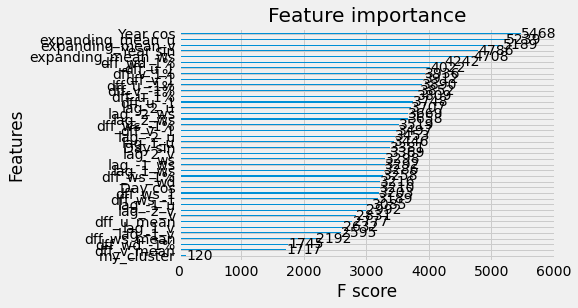

<IPython.core.display.Javascript object>

{"learner":{"generic_param":{"enable_experimental_json_serialization":"0","gpu_id":"-1","gpu_page_size":"0","n_gpus":"0","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"1"},"gradient_booster":{"gbtree_train_param":{"num_parallel_tree":"1","predictor":"auto","process_type":"default","tree_method":"exact","updater":"grow_colmaker,prune","updater_seq":"grow_colmaker,prune"},"name":"gbtree","specified_updater":false,"updater":{"grow_colmaker":{"colmaker_train_param":{"opt_dense_col":"1"},"train_param":{"alpha":"0","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"0.600000024","default_direction":"learn","enable_feature_grouping":"0","eta":"0.0500000007","gamma":"0","grow_policy":"depthwise","interaction_constraints":"","lambda":"1","learning_rate":"0.0500000007","max_bin":"256","max_conflict_rate":"0","max_delta_step":"0","max_depth":"13","max_leaves":"0","max_search_group":"100","min_child_weight":"9

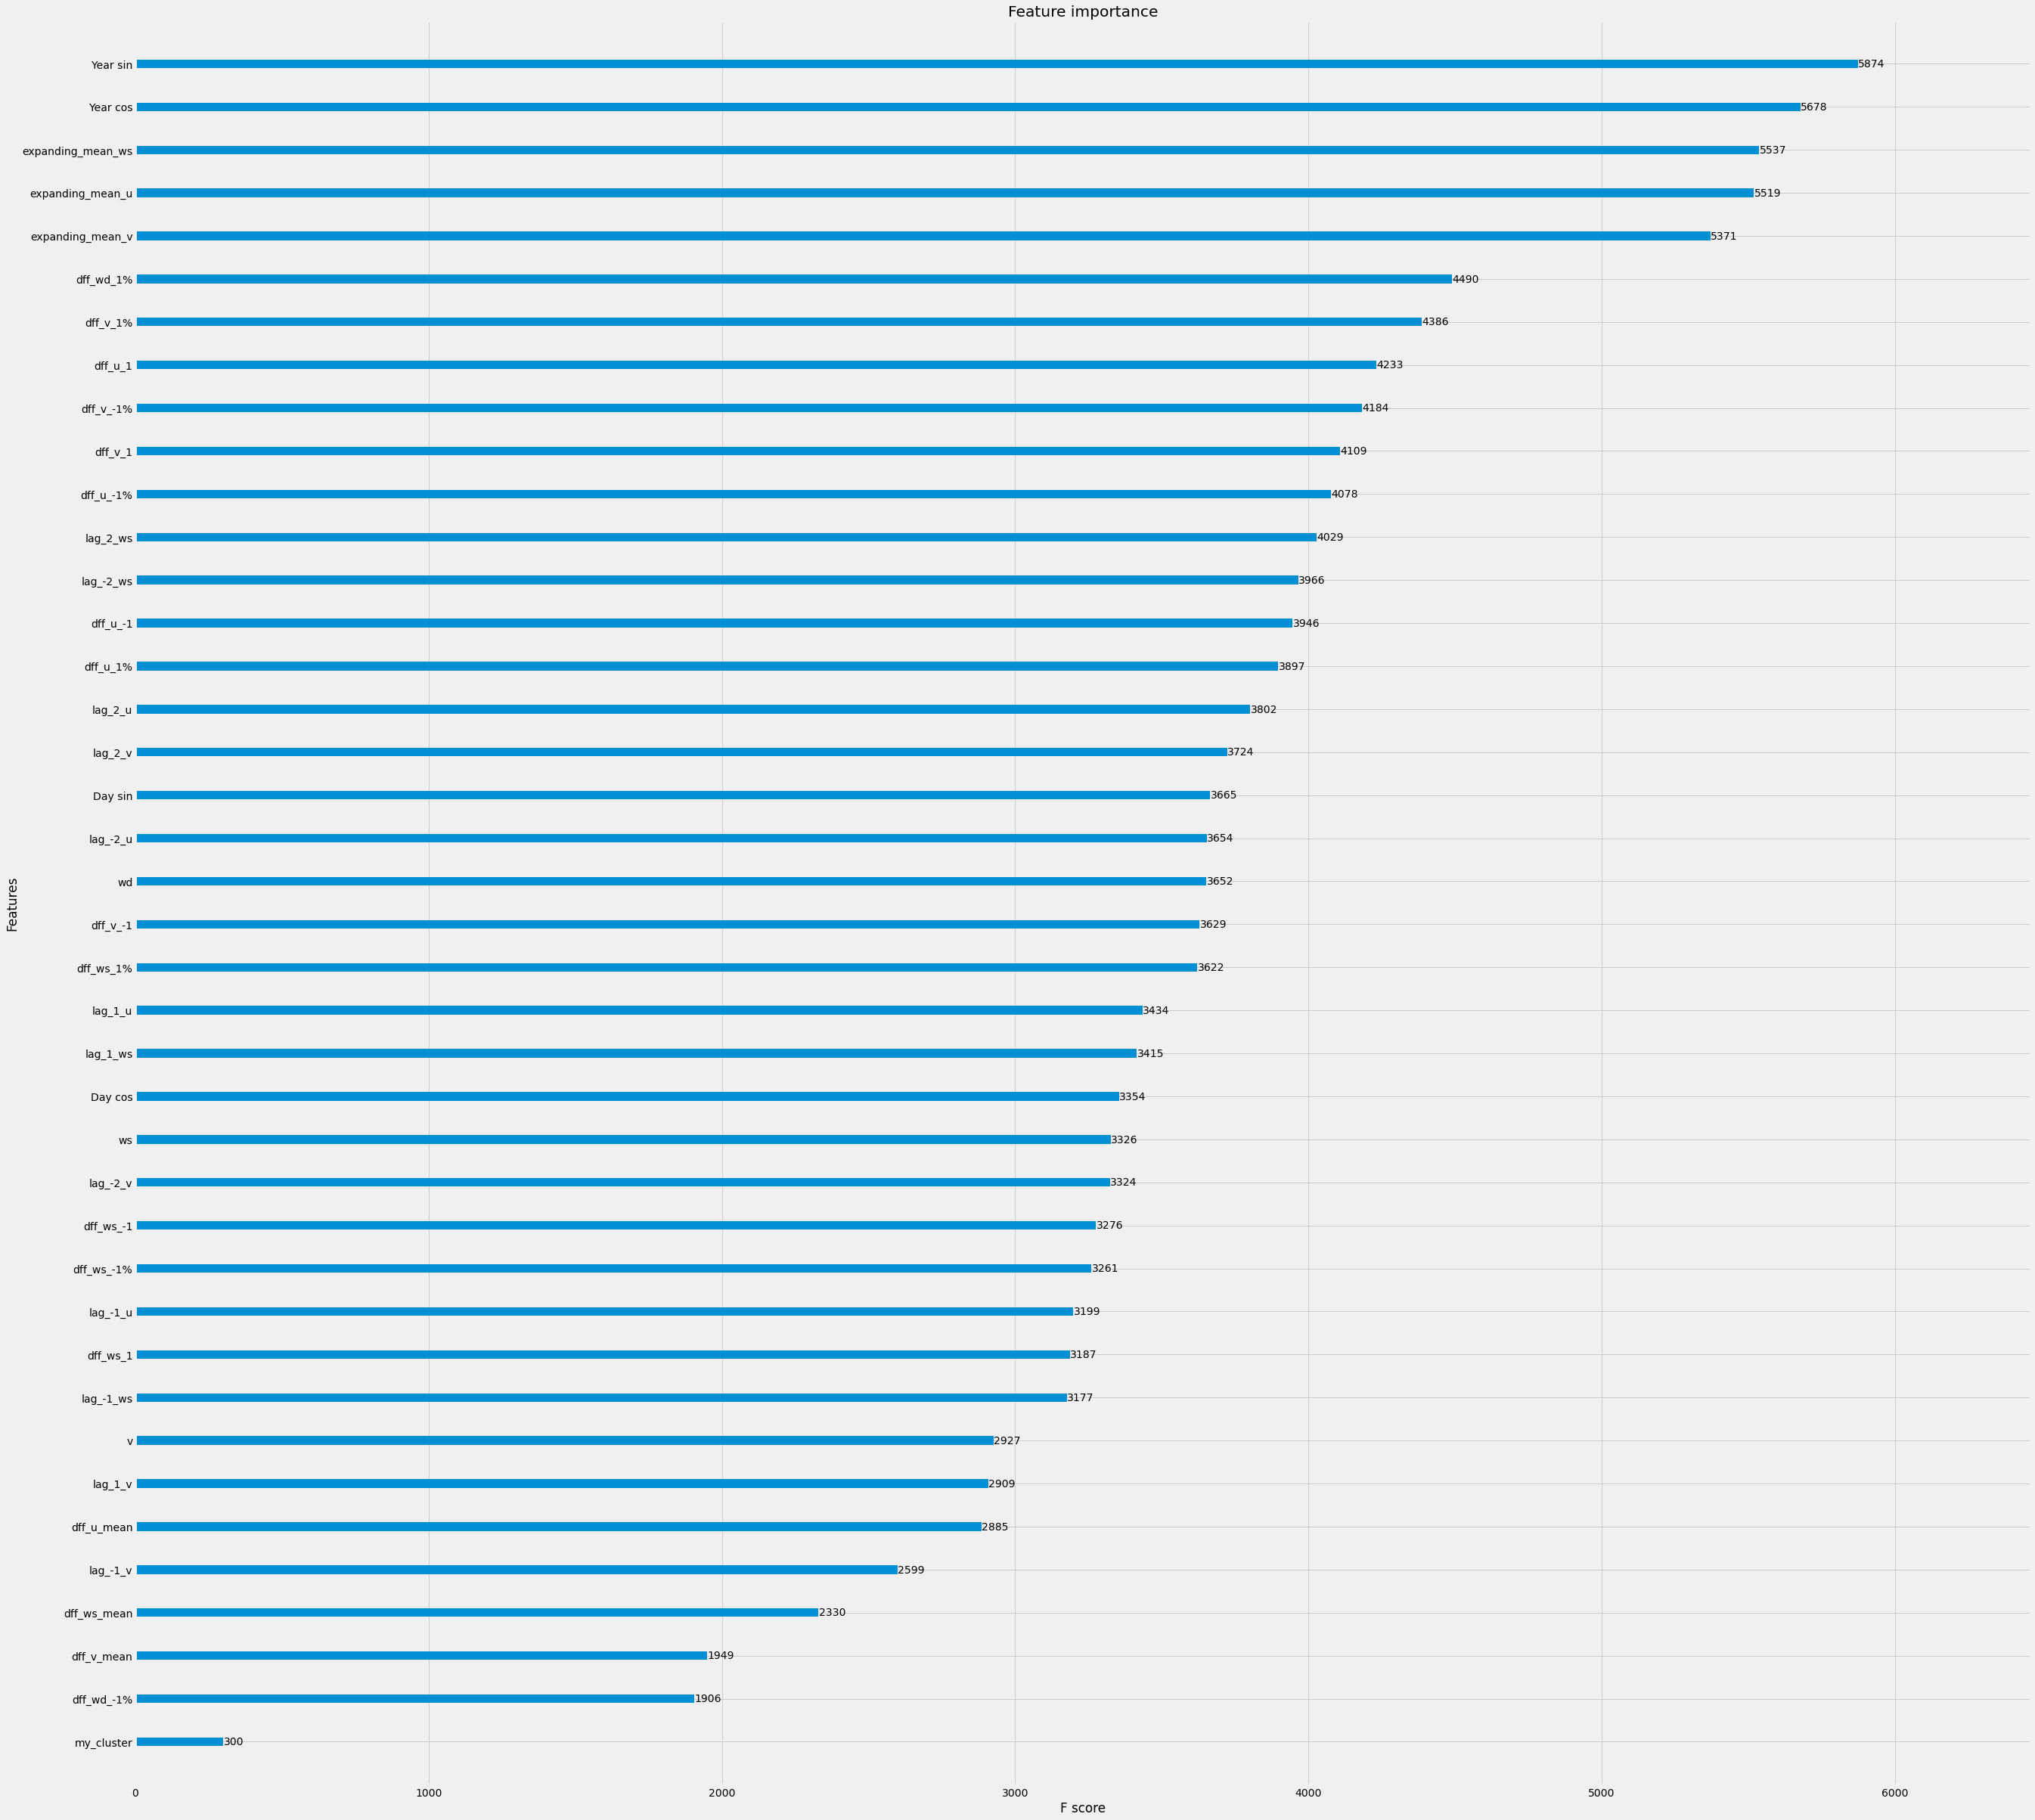

<IPython.core.display.Javascript object>

{"learner":{"generic_param":{"enable_experimental_json_serialization":"0","gpu_id":"-1","gpu_page_size":"0","n_gpus":"0","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"1"},"gradient_booster":{"gbtree_train_param":{"num_parallel_tree":"1","predictor":"auto","process_type":"default","tree_method":"exact","updater":"grow_colmaker,prune","updater_seq":"grow_colmaker,prune"},"name":"gbtree","specified_updater":false,"updater":{"grow_colmaker":{"colmaker_train_param":{"opt_dense_col":"1"},"train_param":{"alpha":"0","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"0.600000024","default_direction":"learn","enable_feature_grouping":"0","eta":"0.0500000007","gamma":"0","grow_policy":"depthwise","interaction_constraints":"","lambda":"1","learning_rate":"0.0500000007","max_bin":"256","max_conflict_rate":"0","max_delta_step":"0","max_depth":"13","max_leaves":"0","max_search_group":"100","min_child_weight":"9

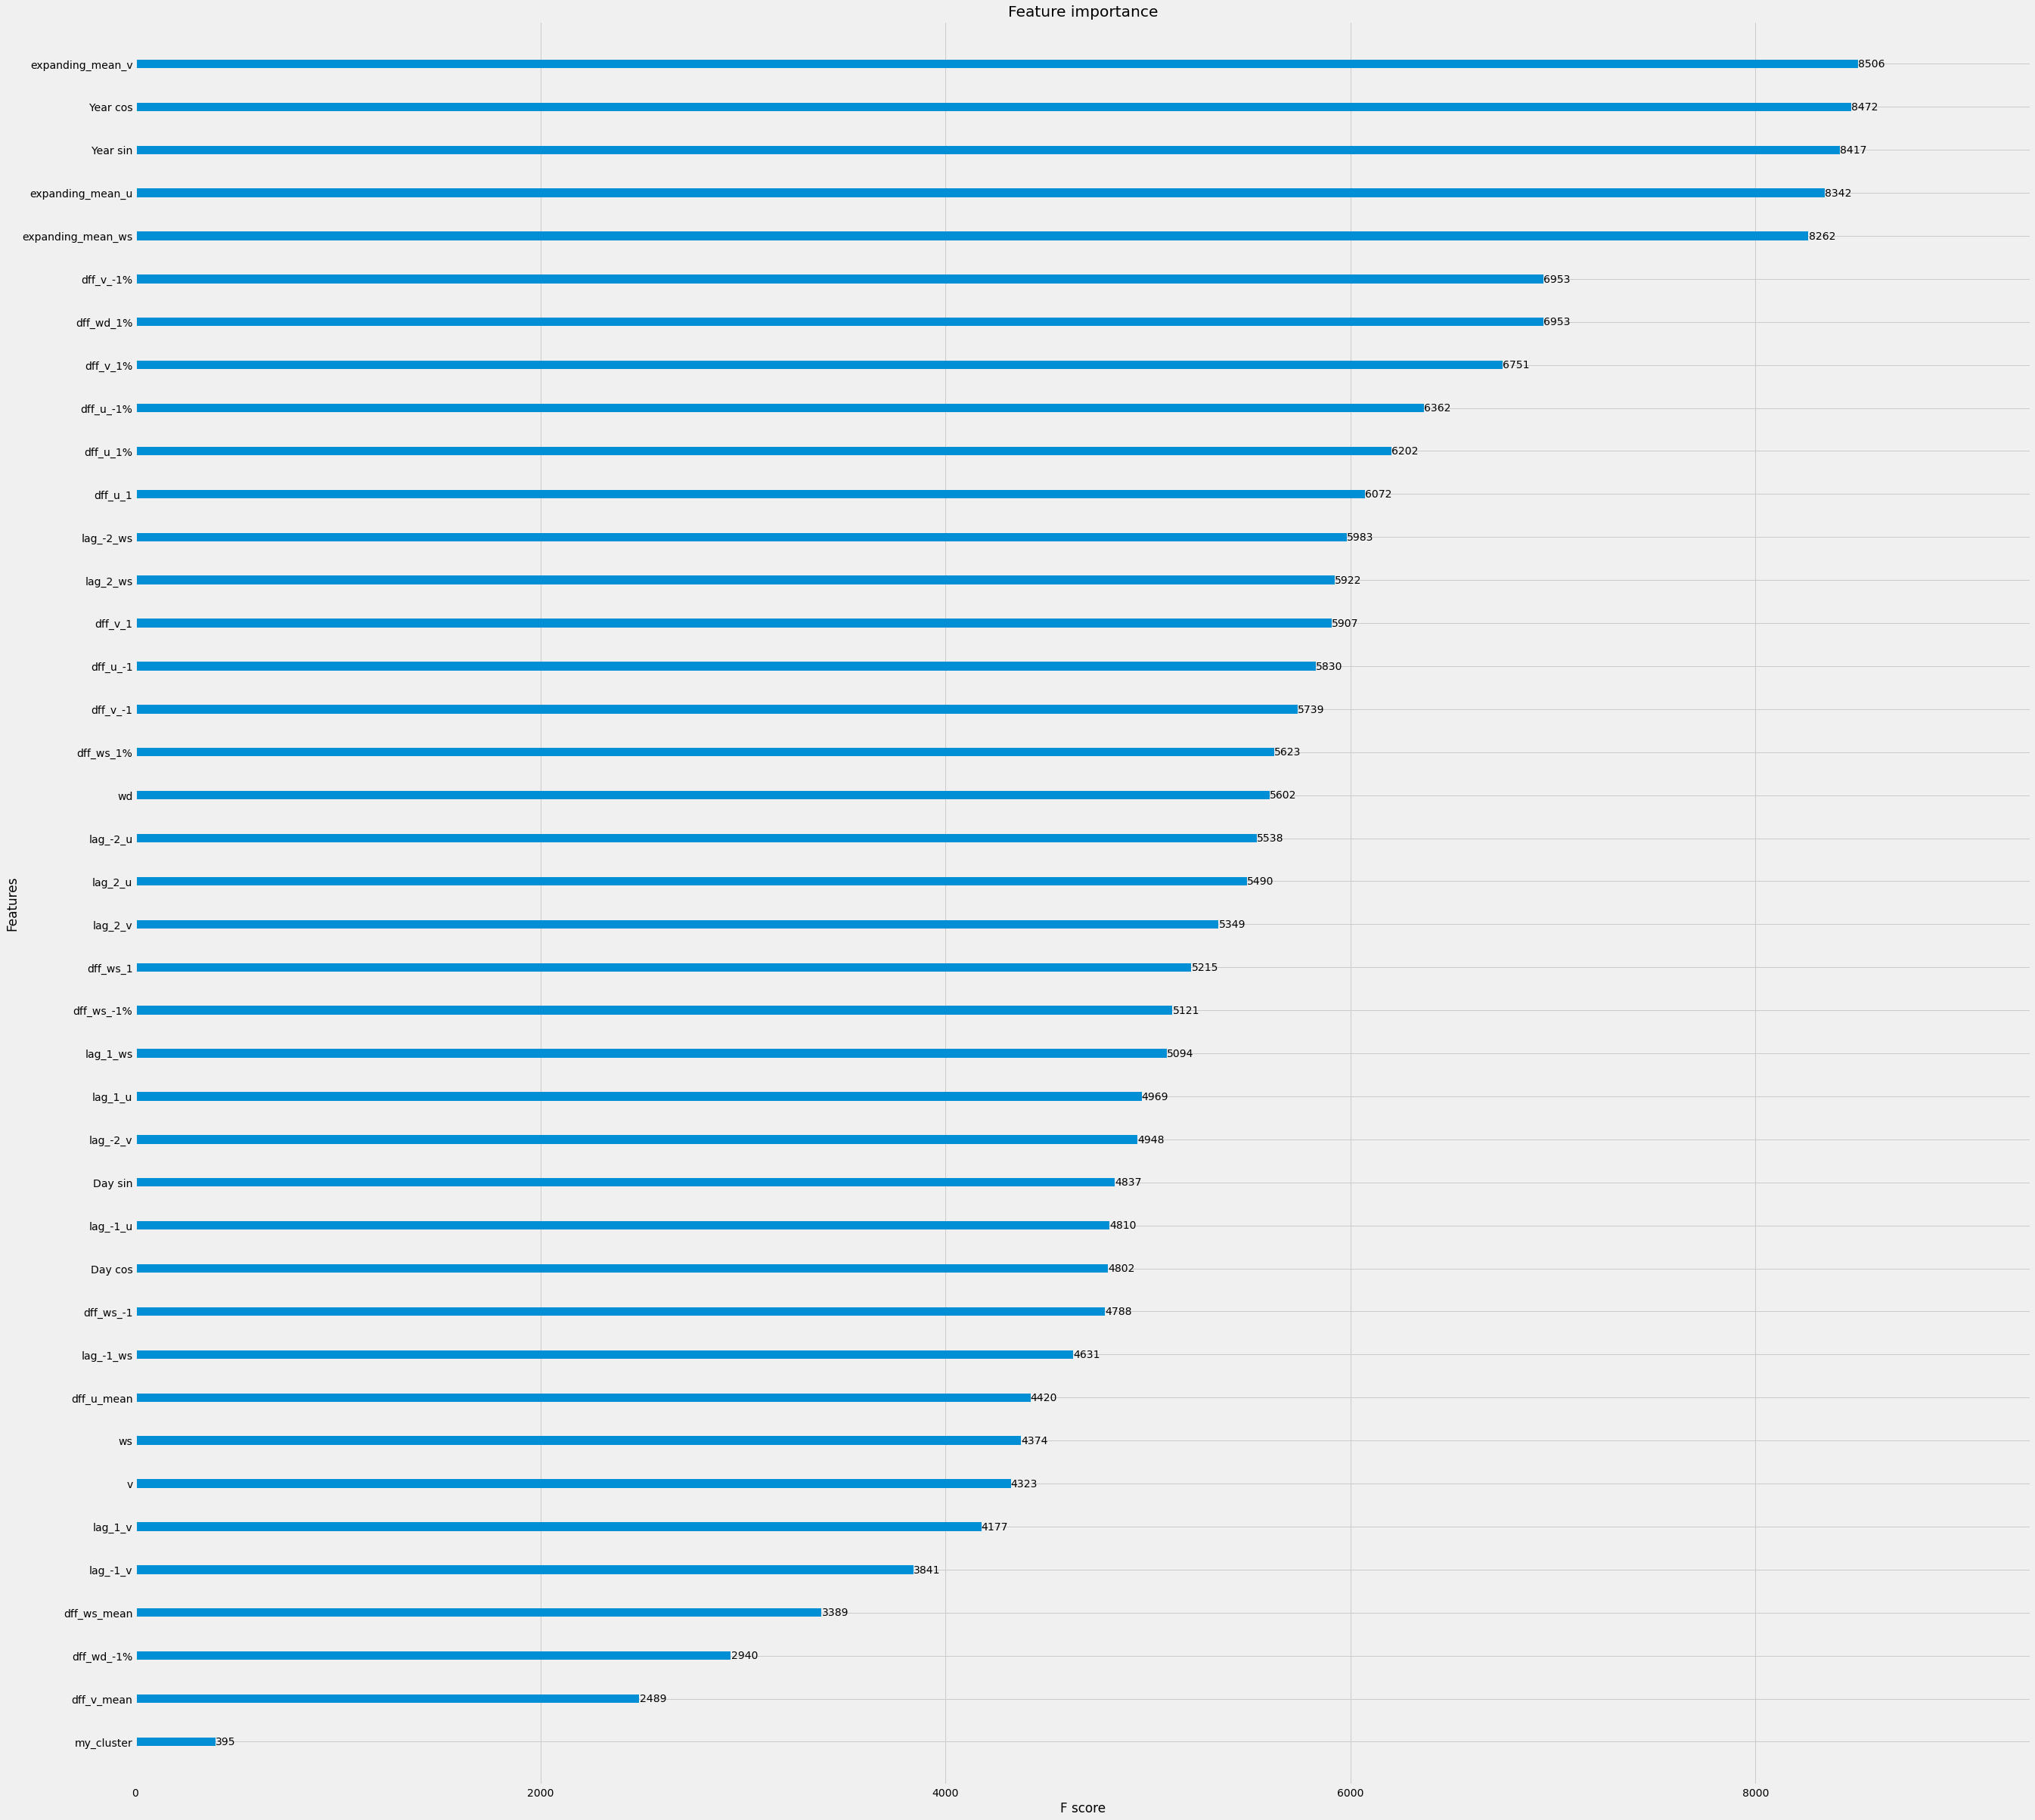

<IPython.core.display.Javascript object>

{"learner":{"generic_param":{"enable_experimental_json_serialization":"0","gpu_id":"-1","gpu_page_size":"0","n_gpus":"0","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"1"},"gradient_booster":{"gbtree_train_param":{"num_parallel_tree":"1","predictor":"auto","process_type":"default","tree_method":"exact","updater":"grow_colmaker,prune","updater_seq":"grow_colmaker,prune"},"name":"gbtree","specified_updater":false,"updater":{"grow_colmaker":{"colmaker_train_param":{"opt_dense_col":"1"},"train_param":{"alpha":"0","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"0.600000024","default_direction":"learn","enable_feature_grouping":"0","eta":"0.0500000007","gamma":"0","grow_policy":"depthwise","interaction_constraints":"","lambda":"1","learning_rate":"0.0500000007","max_bin":"256","max_conflict_rate":"0","max_delta_step":"0","max_depth":"13","max_leaves":"0","max_search_group":"100","min_child_weight":"9

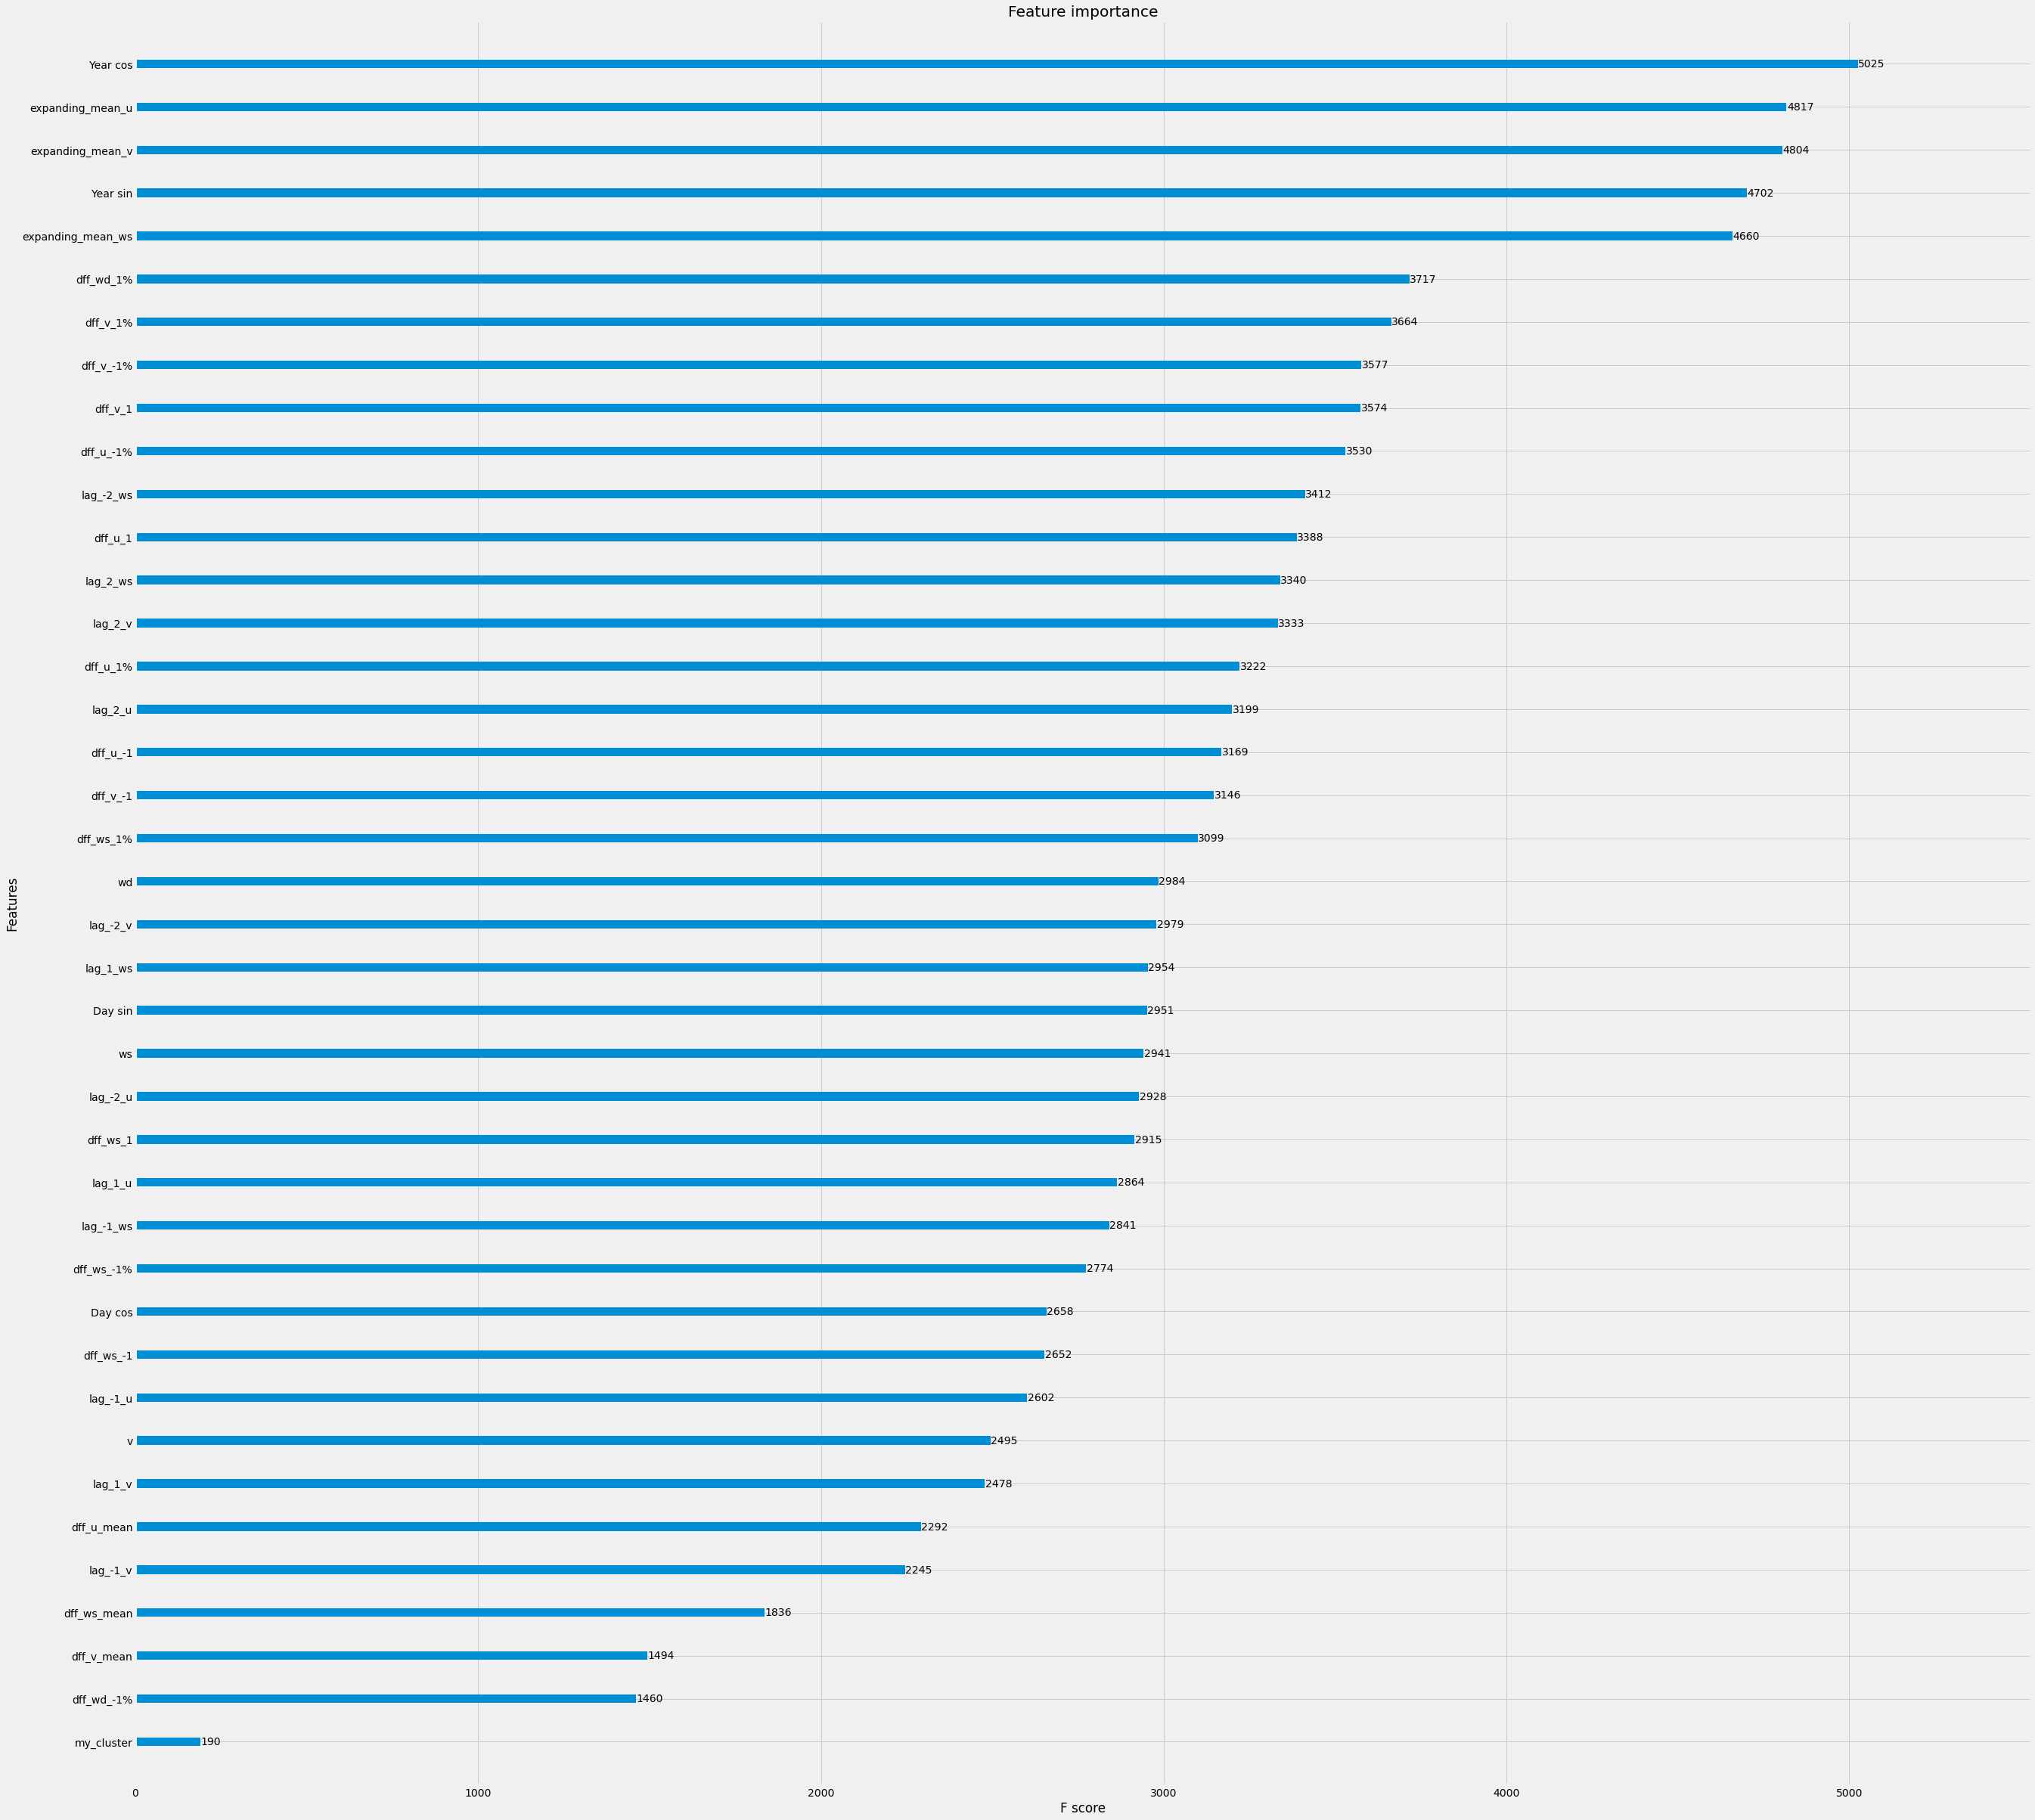

<IPython.core.display.Javascript object>

{"learner":{"generic_param":{"enable_experimental_json_serialization":"0","gpu_id":"-1","gpu_page_size":"0","n_gpus":"0","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"1"},"gradient_booster":{"gbtree_train_param":{"num_parallel_tree":"1","predictor":"auto","process_type":"default","tree_method":"exact","updater":"grow_colmaker,prune","updater_seq":"grow_colmaker,prune"},"name":"gbtree","specified_updater":false,"updater":{"grow_colmaker":{"colmaker_train_param":{"opt_dense_col":"1"},"train_param":{"alpha":"0","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"0.600000024","default_direction":"learn","enable_feature_grouping":"0","eta":"0.0500000007","gamma":"0","grow_policy":"depthwise","interaction_constraints":"","lambda":"1","learning_rate":"0.0500000007","max_bin":"256","max_conflict_rate":"0","max_delta_step":"0","max_depth":"13","max_leaves":"0","max_search_group":"100","min_child_weight":"9

In [11]:
#from pandas.io.json import json_normalize
from datetime import date
import json
#param_list = pd.DataFrame()
prediction = pd.DataFrame()
start_date = "2009-07-01 00:00:00"
end_date = "2010-12-31 23:00:00"

save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase_2_Lucy/result/'
model_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase_2_Lucy/model/'
months_predict = ['201101', '201102', '201103','201104','201105','201106','201107','201108','201109','201110','201111','201112','201201','201202','201203','201204','201205','201206']
# train_end_date = ["2010-12-31 23:00:00",
#                 "2011-01-31 23:00:00",
#                 "2011-02-28 23:00:00",
#                 "2011-03-31 23:00:00",
#                 "2011-04-30 23:00:00",
#                 "2011-05-30 23:00:00",
#                 "2011-06-30 23:00:00",
#                 "2011-07-31 23:00:00",
#                 "2011-08-31 23:00:00",
#                 "2011-09-30 23:00:00",
#                 "2011-10-31 23:00:00",  
#                 "2011-11-30 23:00:00",
#                 "2011-12-31 23:00:00",
#                 "2012-01-31 23:00:00",
#                 "2012-02-29 23:00:00",
#                 "2012-03-31 23:00:00",
#                 "2012-04-30 23:00:00",
                "2012-05-31 23:00:00"]

for year, end_date in zip(months_predict, train_end_date):
    for name,df in zip(["wp1", "wp2", "wp3", "wp4", "wp5", "wp6"],[wp1,wp2,wp3,wp4,wp5,wp6]):
        print('------ name is :', name, "------")
        #split my merged dataset
        data, test, X, y, X_forecast = data_test_split(df, model_address=model_address, start_date=start_date, end_date=end_date, name=name)
        #split to train model
        X_train, X_test, y_train, y_test = split_data(data,X,y)
        model,param = model1.run_xgb(X_train, X_test, y_train, y_test, params, num_boost_round=num_boost_round,
                            tune_parameter=False, grid_search=False, graph=True)
        X_forecast = xgb.DMatrix(data=X_forecast)
        df_predictions = pd.DataFrame({
            'date': test.index,
            name: model.predict(X_forecast),
        })
        model.save_model(model_address+"model_{}.json".format(name))
        #df_predictions.to_csv(save_address+"pred_{}.csv".format(name))
        print(param)
        print(type(param)) #This is string type
        #param = json.loads(param)
        with open(model_address+"param_{}.json".format(name), 'w') as f:
            json.dump(param, f)
        #param_list = param_list.append(param)
        if name =='wp1':
            prediction = df_predictions
        else:
            prediction = prediction.merge(df_predictions,on=['date'])

    prediction.rename(columns={'date': 'date1'}, inplace=True)
    data_path = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/data/'
    test = pd.read_csv(f'{data_path}test.csv')
    prediction = pd.concat([test, prediction], axis=1)
    prediction.drop(columns='date1', inplace=True)

    save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase_2_Lucy/result/before_submission/'
    prediction.to_csv(
        save_address+'predictions_end_date_{}.csv'.format(year), index=False, sep=';')


In [16]:
def read_folder(file_folder):
    """
        Read all files in the folder
        """
    files = os.listdir(file_folder)
    df = []
    for f in files:
        print(f)
        my_file = file_folder + "/" + f
        temp = pd.read_csv(my_file, sep=';')
        temp['file_name']=f
        df.append(temp)
    df_full = pd.concat(df, ignore_index=True)
    return df_full


In [17]:
df_full = read_folder(
    "C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase_2_Lucy/result/before_submission/")


predictions_end_date_201101.csv
predictions_end_date_201102.csv
predictions_end_date_201103.csv
predictions_end_date_201104.csv
predictions_end_date_201105.csv
predictions_end_date_201106.csv
predictions_end_date_201107.csv
predictions_end_date_201108.csv
predictions_end_date_201109.csv
predictions_end_date_201110.csv
predictions_end_date_201111.csv
predictions_end_date_201112.csv
predictions_end_date_201201.csv
predictions_end_date_201202.csv
predictions_end_date_201203.csv
predictions_end_date_201204.csv
predictions_end_date_201205.csv
predictions_end_date_201206.csv


In [20]:
df_full

,date,wp1,wp2,wp3,wp4,wp5,wp6,file_name,file_forecast_month,forecast_month,match
0,2011010101,0.686557,0.475643,0.019801,0.535858,0.891682,0.566993,predictions_end_date_201101.csv,201101,201101,True
1,2011010102,0.604198,0.540002,0.074866,0.491515,0.836147,0.390436,predictions_end_date_201101.csv,201101,201101,True
2,2011010103,0.513439,0.625290,0.105845,0.510211,0.847238,0.285408,predictions_end_date_201101.csv,201101,201101,True
3,2011010104,0.610215,0.668209,0.241525,0.520363,0.878049,0.257714,predictions_end_date_201101.csv,201101,201101,True
4,2011010105,0.603183,0.558447,0.378607,0.547382,0.878072,0.267181,predictions_end_date_201101.csv,201101,201101,True
...,...,...,...,...,...,...,...,...,...,...,...
133915,2012062420,0.139024,0.263127,0.226306,0.201145,0.189181,0.424265,predictions_end_date_201206.csv,201206,201206,True
133916,2012062421,0.114267,0.023672,0.336066,0.226083,0.158305,0.447711,predictions_end_date_201206.csv,201206,201206,True
133917,2012062422,0.121916,0.027618,0.409384,0.173480,0.134978,0.262202,predictions_end_date_201206.csv,201206,201206,True
133918,2012062423,0.104270,0.081350,0.371208,0.156771,0.170097,0.170997,predictions_end_date_201206.csv,201206,201206,True


In [21]:
df_full['file_forecast_month'] = df_full['file_name'].str[21:27]
df_full['forecast_month'] = df_full['date'].astype(str).str[0:6]

df_full['match'] = np.where(df_full['file_forecast_month']
                       == df_full['forecast_month'],True,False)
df_full=df_full[df_full['match']==True]
prediction = df_full.drop(
    columns=['file_forecast_month', 'match', 'file_name', 'forecast_month'])
save_address2 = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase_2_Lucy/result/submission/'
prediction.to_csv(
    save_address2+'predictions_{}.csv'.format(date.today()), index=False, sep=';')


<IPython.core.display.Javascript object>

# Merge predictions

read_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/'
pred_wp1=pd.read_csv(read_address+"pred_wp1.csv")
pred_wp2=pd.read_csv(read_address+"pred_wp2.csv")
pred_wp3=pd.read_csv(read_address+"pred_wp3.csv")
pred_wp4=pd.read_csv(read_address+"pred_wp4.csv")
pred_wp5=pd.read_csv(read_address+"pred_wp5.csv")
pred_wp6=pd.read_csv(read_address+"pred_wp6.csv")

In [ ]:
# read_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/'
# save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/result/submission/'
# pred1=pd.read_csv(read_address+'pred_wp1.csv')
# pred2=pd.read_csv(read_address+'pred_wp2.csv')
# pred3=pd.read_csv(read_address+'pred_wp3.csv')
# pred4=pd.read_csv(read_address+'pred_wp4.csv')
# pred5=pd.read_csv(read_address+'pred_wp5.csv')
# pred6 = pd.read_csv(read_address+'pred_wp6.csv')

# merge_pred=pd.DataFrame()
# merge_pred=pred1
# merge_pred = merge_pred.merge(pred2,on='date')
# merge_pred = merge_pred.merge(pred3,on='date')
# merge_pred = merge_pred.merge(pred4,on='date')
# merge_pred = merge_pred.merge(pred5,on='date')
# merge_pred = merge_pred.merge(pred6,on='date')


# merge_pred.to_csv('predictions.csv', index=False, sep=';')
# df_predictions.head()


In [ ]:
import json
model_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase_2_Lucy/model/'
def read_my_json(model_address,my_file):
    f = open(model_address+my_file)
    json_file = json.load(f)
    return json_file


param1 = json.loads(read_my_json(model_address,'param_wp1.json'))
param2 = json.loads(read_my_json(model_address, 'param_wp2.json'))
param3=json.loads(read_my_json(model_address, 'param_wp3.json'))
param4=json.loads(read_my_json(model_address, 'param_wp4.json'))
param5=json.loads(read_my_json(model_address, 'param_wp5.json'))
param6=json.loads(read_my_json(model_address, 'param_wp6.json'))


In [ ]:
df = pd.json_normalize(param1)
df=df.append(pd.json_normalize(param2))
df=df.append(pd.json_normalize(param3))
df=df.append(pd.json_normalize(param4))
df=df.append(pd.json_normalize(param5))
df = df.append(pd.json_normalize(param6))
df=df.reset_index(drop=True)
df.to_csv(model_address + 'my_tuned_params.csv')
